## Project Name: Raisins the Bar

**Group 58: Chehak Sharma, Omer Faraz, Vir Khimji, Jitao Zhang**

### <font color = Purple>Introduction

- *Background Information:*

Raisins are dried grapes. Raisins can be dried in the sun or they can be dried using a mechanical process.[1] As with any kind of fruit, there are different types of raisins. Based on the parameters of their images provided by the dataset, we will be observing and classifying two different types of raisins in this project: Kecimen and Besni raisins.


(Left image below: Kecimen, Right image below: Besni)

<table><tr>
<td> <img src="https://www.elmashurma.com/wicexoox/2019/03/konya-kecimen-uzumu-1.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://kuruyemissehri.com.tr/wp-content/uploads/2021/10/besni-uzum.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

- *Predictive question that we will be focusing on:*

__By fixing MajorAxisLength (a numerical variable in the dataset) and combing it with one of the other numerical variables existed in the dataset, we will use <span style='background:yellow'> k-nn classification</span> to compare those different combinations’ prediction accuracies (between the predicted raisin type and the real raisin type).  And what we want to finally reach is that which of the other numerical variables can provide us with the most reliable predictions on raisin type when that is combined with the fixed MajorAxisLength variable.__

Notice: 
1. There will be explanations in below *Data Processing and Result Discovery* part to demonstrate why we choose MajorAxisLength as our fixed variable.
2. We will first filter out some reasonable combinations, and calculate only those combinations' accuracies. The procedure of how we do the filtration will be further demonstrated in below *Data Processing and Result Discovery* part.

- *Information about the Dataset:*

The dataset that our group has chosen to work on is the raisin dataset provided by the UCI Machine Learning Repository.[2] This dataset has seven numerical predictors (Area, Major Axis Length, Minor Axis Length, Eccentricity, Convex Area, Extent and Perimeter). The descriptions and definitions of these variables are below. There is a single categorical predictor - the class, otherwise known as the type of raisin. Based on the values of those numerical predictors, we can predict the class or the type of raisin in an image. In this dataset, there are two classes of raisins: Kecimen and Besni.

These are the variables in the dataset. The first seven predictors are numerical and the last predictor is a character.
1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: The two types of raisin: Kecimen and Besni raisin.

<font color = Red> Since the database does not explicitly tell us the units of each variable and we find it difficult to determine the appropriate units from the data in this database, we will __NOT include any unit__ in our following graphs or analysis process.

### <font color = Purple>Data Processing and Result Discovery

Now, this part is really where we start to code and do data analysis. In order to keep track our process, we divide it into the following 5 parts:

- Part 1: Preparation
- Part 2: Data Preprocessing
- Part 3: Exploratory Data Analysis
- Part 4: Predictive Data Anlysis
- Part 5: Results and Conclusions

We will demonstrate each part detailedly in below sections.

<font color = red>__Part 1: Preparation__

Our codes will cover the following in this part:
- Inputting all needed packages and functions
- Setting the seed
- Loading data that we will be using

In [101]:
# Input all necessary packages
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(cowplot)

In [102]:
# Set seed in order to obtain reproductible results
set.seed(2535) 

In [103]:
# Read data from the website that we are using
url <- "https://drive.google.com/uc?export=download&id=11KyK-H_2aP1I4FYR1aAC0wE4JB9BbAqz"
download.file(url, "raisin.xlsx")
raisin <- read_excel("raisin.xlsx")
head(raisin)

Area  MajorAxisLength MinorAxisLength Eccentricity ConvexArea Extent   
1 87524 442.2460        253.2912        0.8197384    90546      0.7586506
2 75166 406.6907        243.0324        0.8018052    78789      0.6841296
3 90856 442.2670        266.3283        0.7983536    93717      0.6376128
4 45928 286.5406        208.7600        0.6849892    47336      0.6995994
5 79408 352.1908        290.8275        0.5640113    81463      0.7927719
6 49242 318.1254        200.1221        0.7773513    51368      0.6584564
  Perimeter Class  
1 1184.040  Kecimen
2 1121.786  Kecimen
3 1208.575  Kecimen
4  844.162  Kecimen
5 1073.251  Kecimen
6  881.836  Kecimen

<font color = red>__Part 2: Data Preprocessing__

Our codes will cover the following in this part:
- Cleaning and wrangling the data
- Creating the train / test split 
- Demonstrating why we will use MajorAxisLength as our fixed variable and why we will discard one of our combinations (MajorAxisLength & Extent) even before our Part 4: Predictive Data Analysis

In [104]:
# This is where we clean and wrangle our data
# There is really not too much to do since this dataset is already very tidy
raisin <- raisin |>
    mutate(Class = as_factor(Class)) |>
    filter(!is.na(Area),
           !is.na(MajorAxisLength),
           !is.na(MinorAxisLength),
           !is.na(Eccentricity),
           !is.na(ConvexArea),
           !is.na(Extent),
           !is.na(Perimeter))
head(raisin)

Area  MajorAxisLength MinorAxisLength Eccentricity ConvexArea Extent   
1 87524 442.2460        253.2912        0.8197384    90546      0.7586506
2 75166 406.6907        243.0324        0.8018052    78789      0.6841296
3 90856 442.2670        266.3283        0.7983536    93717      0.6376128
4 45928 286.5406        208.7600        0.6849892    47336      0.6995994
5 79408 352.1908        290.8275        0.5640113    81463      0.7927719
6 49242 318.1254        200.1221        0.7773513    51368      0.6584564
  Perimeter Class  
1 1184.040  Kecimen
2 1121.786  Kecimen
3 1208.575  Kecimen
4  844.162  Kecimen
5 1073.251  Kecimen
6  881.836  Kecimen

<font color = brown>* Explanation of the code above:
<br>The data that we have chosen was relevantly clean and requires very few wrangling adjustments. We have used the mutate function in order to modify the category “class” to as.factor, since the class variable represents a category with certain fixed outcomes or values. Thereafter we have decided to filter all the values from the data table that have non existent values, represented by the is.na! function.

In [105]:
# Here we are going to separate our data into training set and test test
raisin_split <- initial_split(raisin, prop = 0.7, strata = Class)
raisin_train <- training(raisin_split)
raisin_test <- testing(raisin_split)

<font color = brown>* Explanation of the code above:
<br>The data will now be split into the training data and the testing data , where the proportion of data used in the training set will be 70 percent , and the strata is set to class as that will be the exploratory variable we are looking to predict.

In [106]:
decide_recipe <- recipe(Class ~ ., data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()

decide_data <- bake(decide_recipe, raisin_train)
head(decide_data)

Area       MajorAxisLength MinorAxisLength Eccentricity ConvexArea Extent    
1  1.3058565  1.9159088       0.3924262      1.417334846   1.2825230  0.5977362
2  0.7909821  0.9079717       0.6949209      0.669403207   0.8150746  0.5682589
3  0.2498630  0.1572109       0.4925829      0.005492329   0.2394630  0.1275983
4 -0.6560285 -0.2156557      -0.8709853      0.827959068  -0.5654958 -1.9227672
5  1.7349142  1.3643469       1.6646284      0.402433114   1.6680215  0.4092748
6  1.2213790  1.4930019       0.6914924      1.079157235   1.1717606  0.8004837
  Perimeter  Class
1  1.5657658 Besni
2  0.9884439 Besni
3  0.2044756 Besni
4 -0.2822601 Besni
5  1.3468693 Besni
6  1.2272835 Besni

##### Figure 1 (below): Boxplots for different variables vs types of raisin 

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


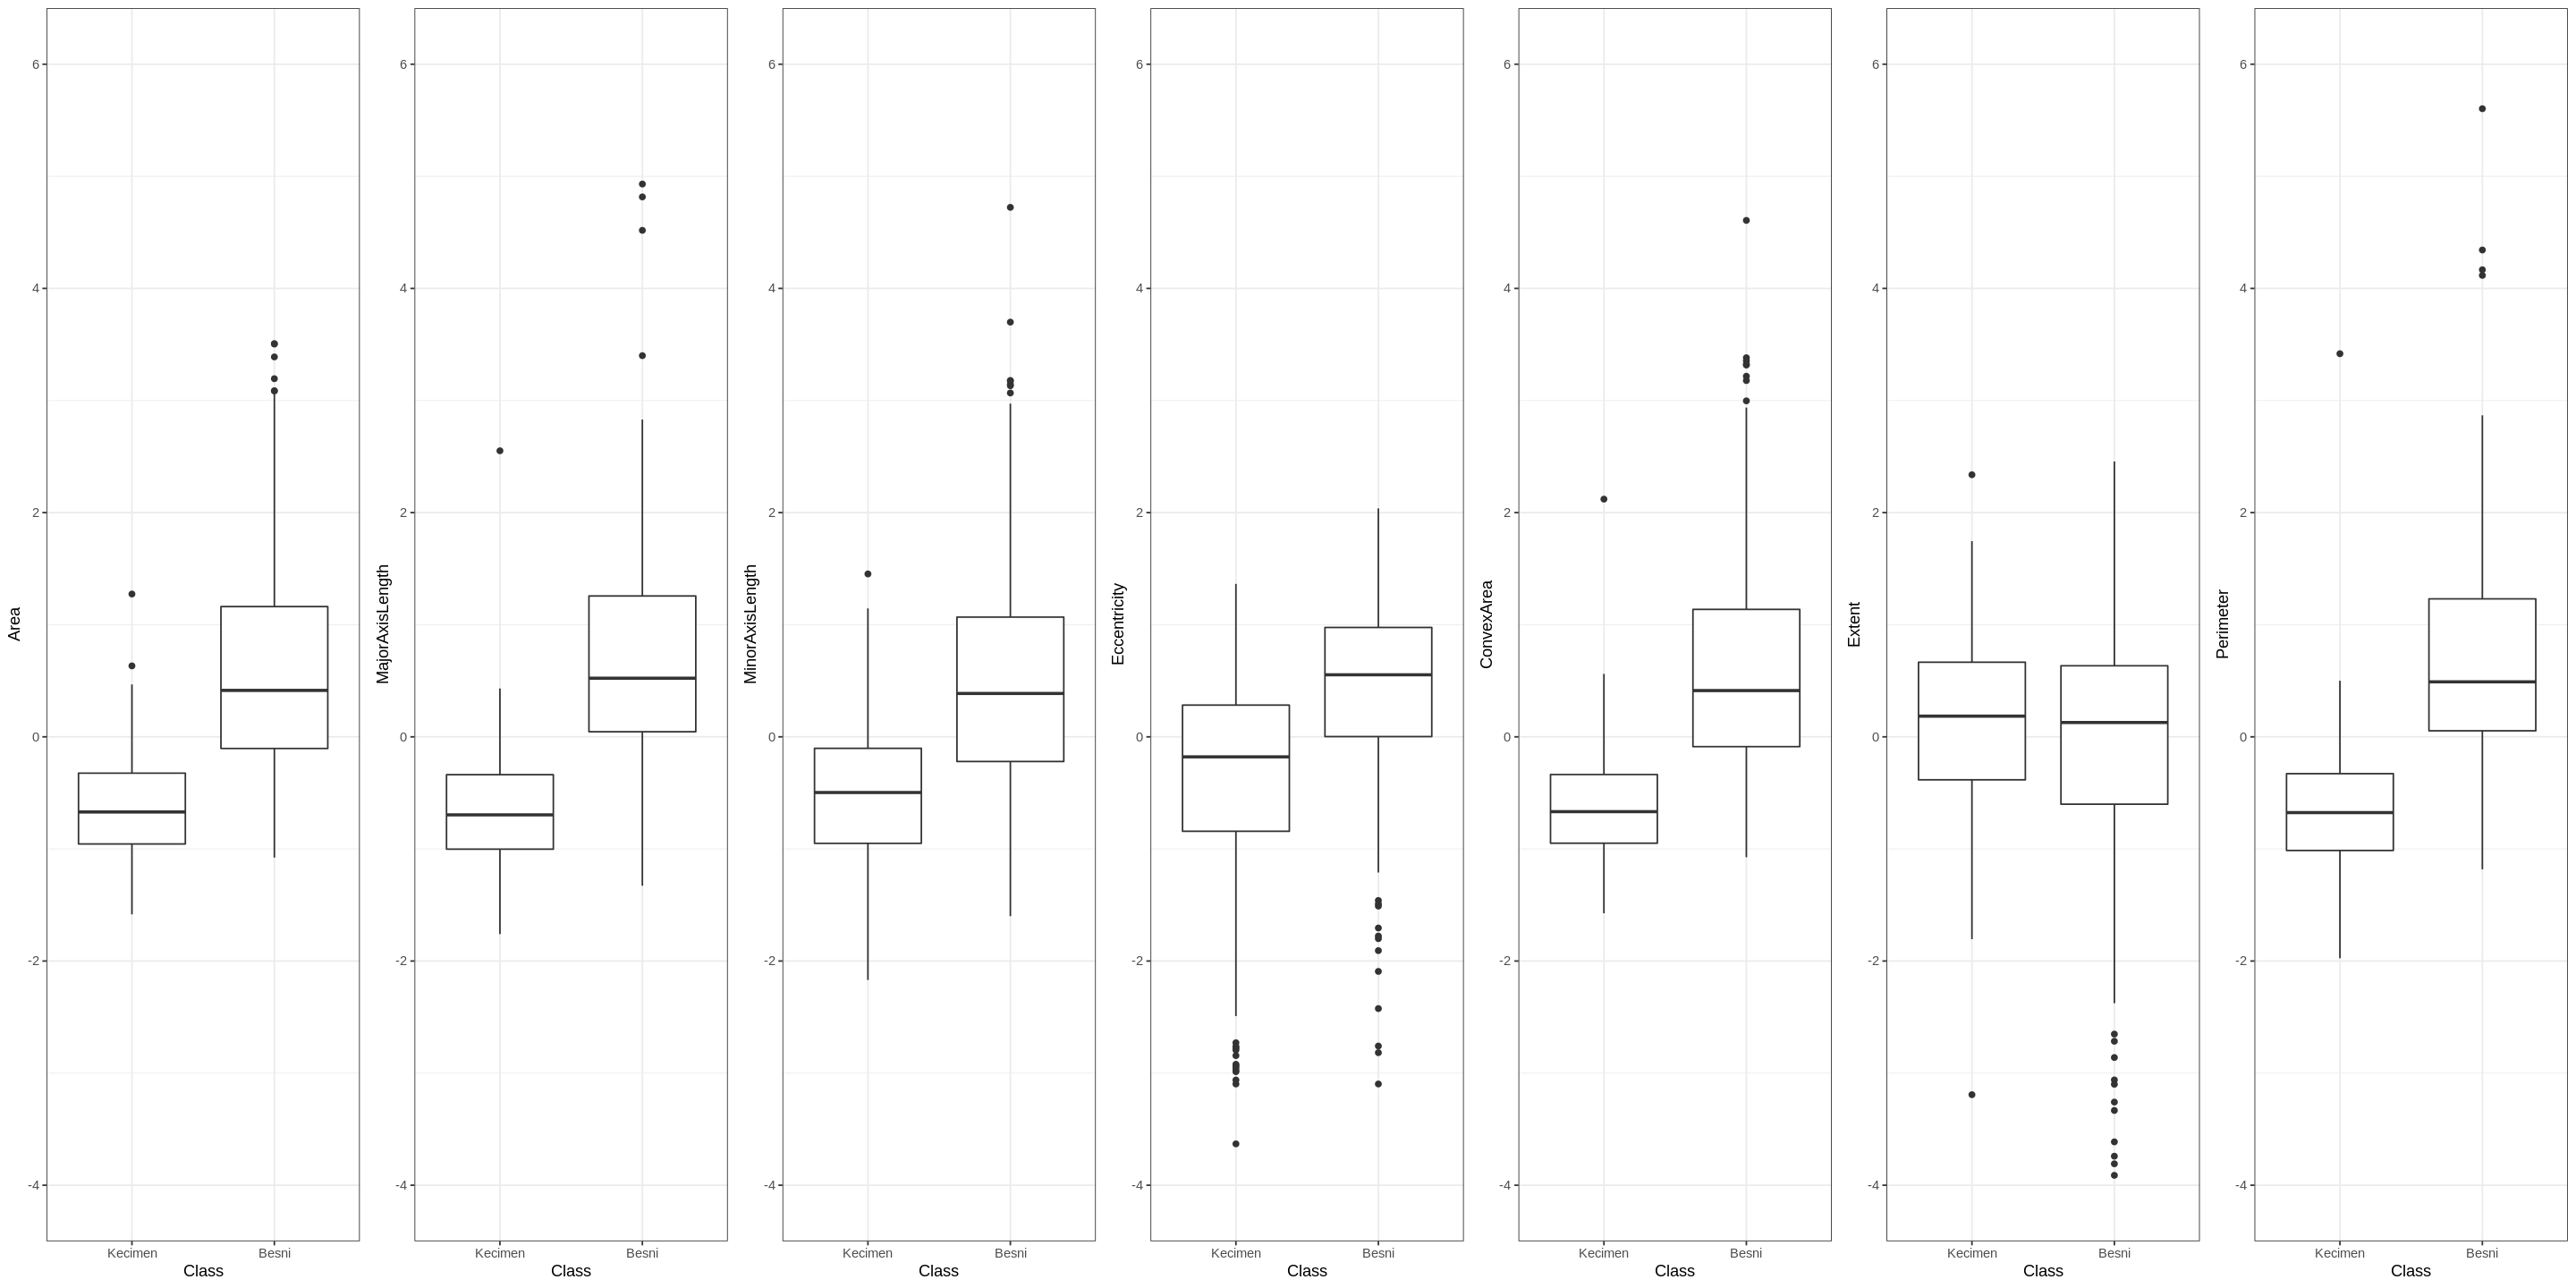

In [107]:
options(repr.plot.width = 24, repr.plot.height = 12)
graph_Ar <- ggplot(data = decide_data, mapping = aes(x = Class, y = Area)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Mal <- ggplot(data = decide_data, mapping = aes(x = Class, y = MajorAxisLength)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Mil <- ggplot(data = decide_data, mapping = aes(x = Class, y = MinorAxisLength)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Ecc <- ggplot(data = decide_data, mapping = aes(x = Class, y = Eccentricity)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Convex <- ggplot(data = decide_data, mapping = aes(x = Class, y = ConvexArea)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Ex <- ggplot(data = decide_data, mapping = aes(x = Class, y = Extent)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Per <- ggplot(data = decide_data, mapping = aes(x = Class, y = Perimeter)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
compare_graph <- plot_grid(graph_Ar,
                           graph_Mal,
                           graph_Mil,
                           graph_Ecc,
                           graph_Convex,
                           graph_Ex,
                           graph_Per,
                           ncol = 7)
compare_graph

<font color = brown>* Explanation of the codes above:
<br> We first standardize all the data so that we can put different numerical parameters into boxplots with the same scale. Thus, when we are comparing those boxplots, we won't be bothered by issues such as proportion. Moreover, we set the same y-limit for every boxplot above by using ylim(c(-4, 6)) and put all the boxplots side-by-side through plot_grid() in order to make us eaiser to see and compare those plots.

<span style='background:springgreen'> What we discover from Figure 1 visualization above:</span>
<br> As we can see above, most numerical parameters have different interval ranges for two types of raisins. But when we take a closer look at the predictor *Extent*, its interval ranges for both types of raisins are mostly overlapping, which means that it will be futile/unnecessary to use this predictor in our following analysis since it won't contribute too much on distinguishing between different types of raisins. <font color = red>Therefore, we will exclude *Extent* in our subsequent analysis.

##### Figure 2 (below): Boxplots for MajorAxisLength vs Class and Perimeter vs Class

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”


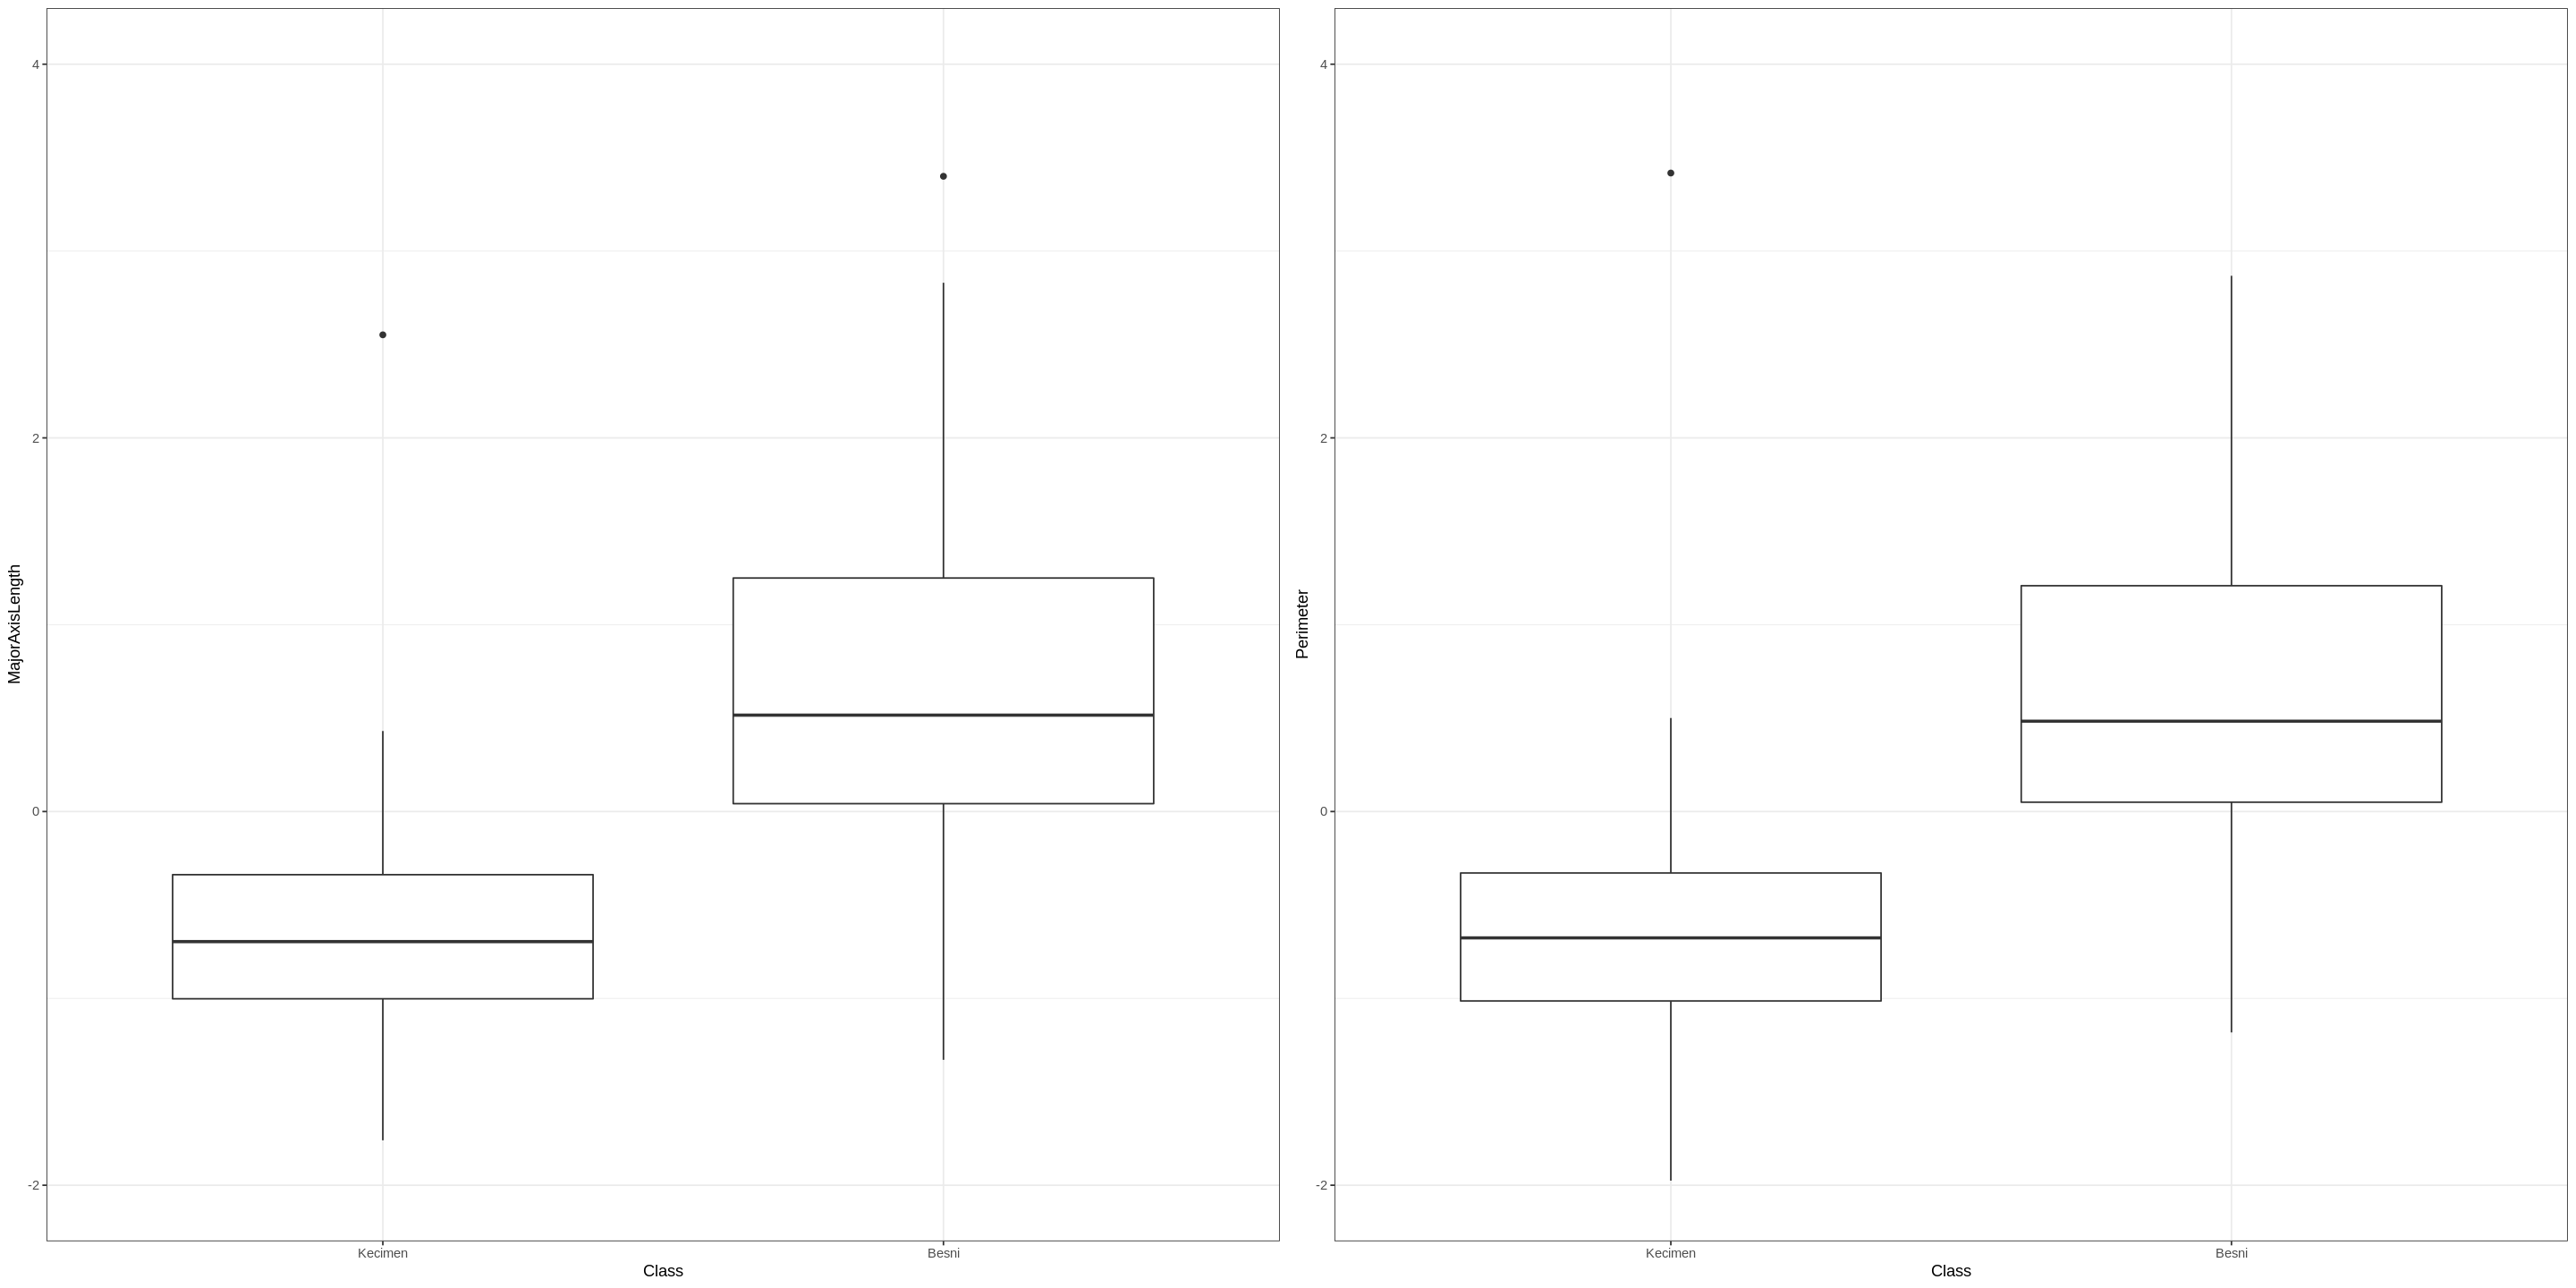

In [108]:
# Since the boxplots for MajorAxisLength & Class and Perimeter & Class are very similar in Figure 1,
# we put these two separately in below to determine which variable to be used as our fixed variable

graph_Mal_bigger <- ggplot(data = decide_data, mapping = aes(x = Class, y = MajorAxisLength)) + geom_boxplot() + theme_bw() + ylim(c(-2, 4))
graph_Per_bigger <- ggplot(data = decide_data, mapping = aes(x = Class, y = Perimeter)) + geom_boxplot() + theme_bw() + ylim(c(-2, 4))
compare_Mal_Per <- plot_grid(graph_Mal_bigger, graph_Per_bigger, ncol = 2)
compare_Mal_Per

<span style='background:springgreen'> What we are doing in Figure 2 visualization above:</span>
<br> Remember, we want to fix one of our numerical parameters as one of our predictors in the models. We choose that based on which parameter may contribute the most to distinguishing between raisins. From Figure 1, we can see that both MajorAxisLength and Perimeter show very different interval ranges for the two types of raisins. However, since they are pretty similar in Figure 1, we will put those two separately in Figure 2 above to compare again and decide which one to be used as our fixed variable. It seems to us MajorAxisLength has a slightly greater difference in interval range for the two types of raisins. <font color = red>That is why we will fix MajorAxisLength as one of our predictors.

<font color = red>__Part 3: Exploratory Data Analysis__

Our codes will cover the following in this part:
- Data summary for exploratory analysis
- Data visualization for exploratory analysis
    
Note: 
1. We will be using training data set for this part, and we will also exclude *Extent* variable here (reason is explained above)
2. Figure 3 is a little bit different: We will be using scaled training data set **decide_data** that we obtained before to make the graph. And beyond that, we will still exclude *Extent* variable while making it

##### Table 1 (below): Number of rows in the training dataset

<font color = brown>To get the number of rows in the training data set

In [109]:
table_1 <- raisin_train |>
    summarize(rows = n())
table_1

rows
1 630

##### Table 2 (below): Number of observations in each class

<font color = brown>To find number of observations in each raisin type

In [110]:
table_2 <- raisin_train |>
    group_by(Class) |>
    summarize(n = n())
table_2                                             

Class   n  
1 Kecimen 315
2 Besni   315

##### Table 3 (below): Mean for each variable for both raisin classes

<font color = brown>Here we calculate the mean for each of the variables for both classes of raisins.
<br>We use the select function to exclude extent (as mentioned above) along with class. Moreover we use map_df in order to display our mean results in the table format.

In [111]:
table_3 <- raisin_train |>
    select(- Extent, - Class) |>
    map_df(mean)
table_3                                             

Area     MajorAxisLength MinorAxisLength Eccentricity ConvexArea Perimeter
1 86880.58 428.5736        253.4141        0.7816852    90347.47   1160.895

##### Table 4 (below): Mean for each variable for each class

<font color = brown>We now chose to find the mean for each variable for raisin type. 
<br>We use the group by function once again along with the summarize function, that takes in each column name, and obtains its mean. The columns have now label changes, with their average as the column headers. 

In [112]:
table_4 <- raisin_train |>
    group_by(Class) |>
    summarize(ave_area = mean(Area),
              ave_major_al = mean(MajorAxisLength),
              ave_minor_al = mean(MinorAxisLength),
              ave_ecc = mean(Eccentricity),
              ave_convex = mean(ConvexArea),
              ave_per = mean(Perimeter))
table_4                                             

Class   ave_area  ave_major_al ave_minor_al ave_ecc   ave_convex ave_per  
1 Kecimen  62566.73 351.3758     227.5188     0.7448814  64810.41   978.3173
2 Besni   111194.43 505.7713     279.3095     0.8184891 115884.52  1343.4734

##### Figure 3 (below): how the relationship between predictor "MajorAxisLength" and other predictors determine the type of the raisin

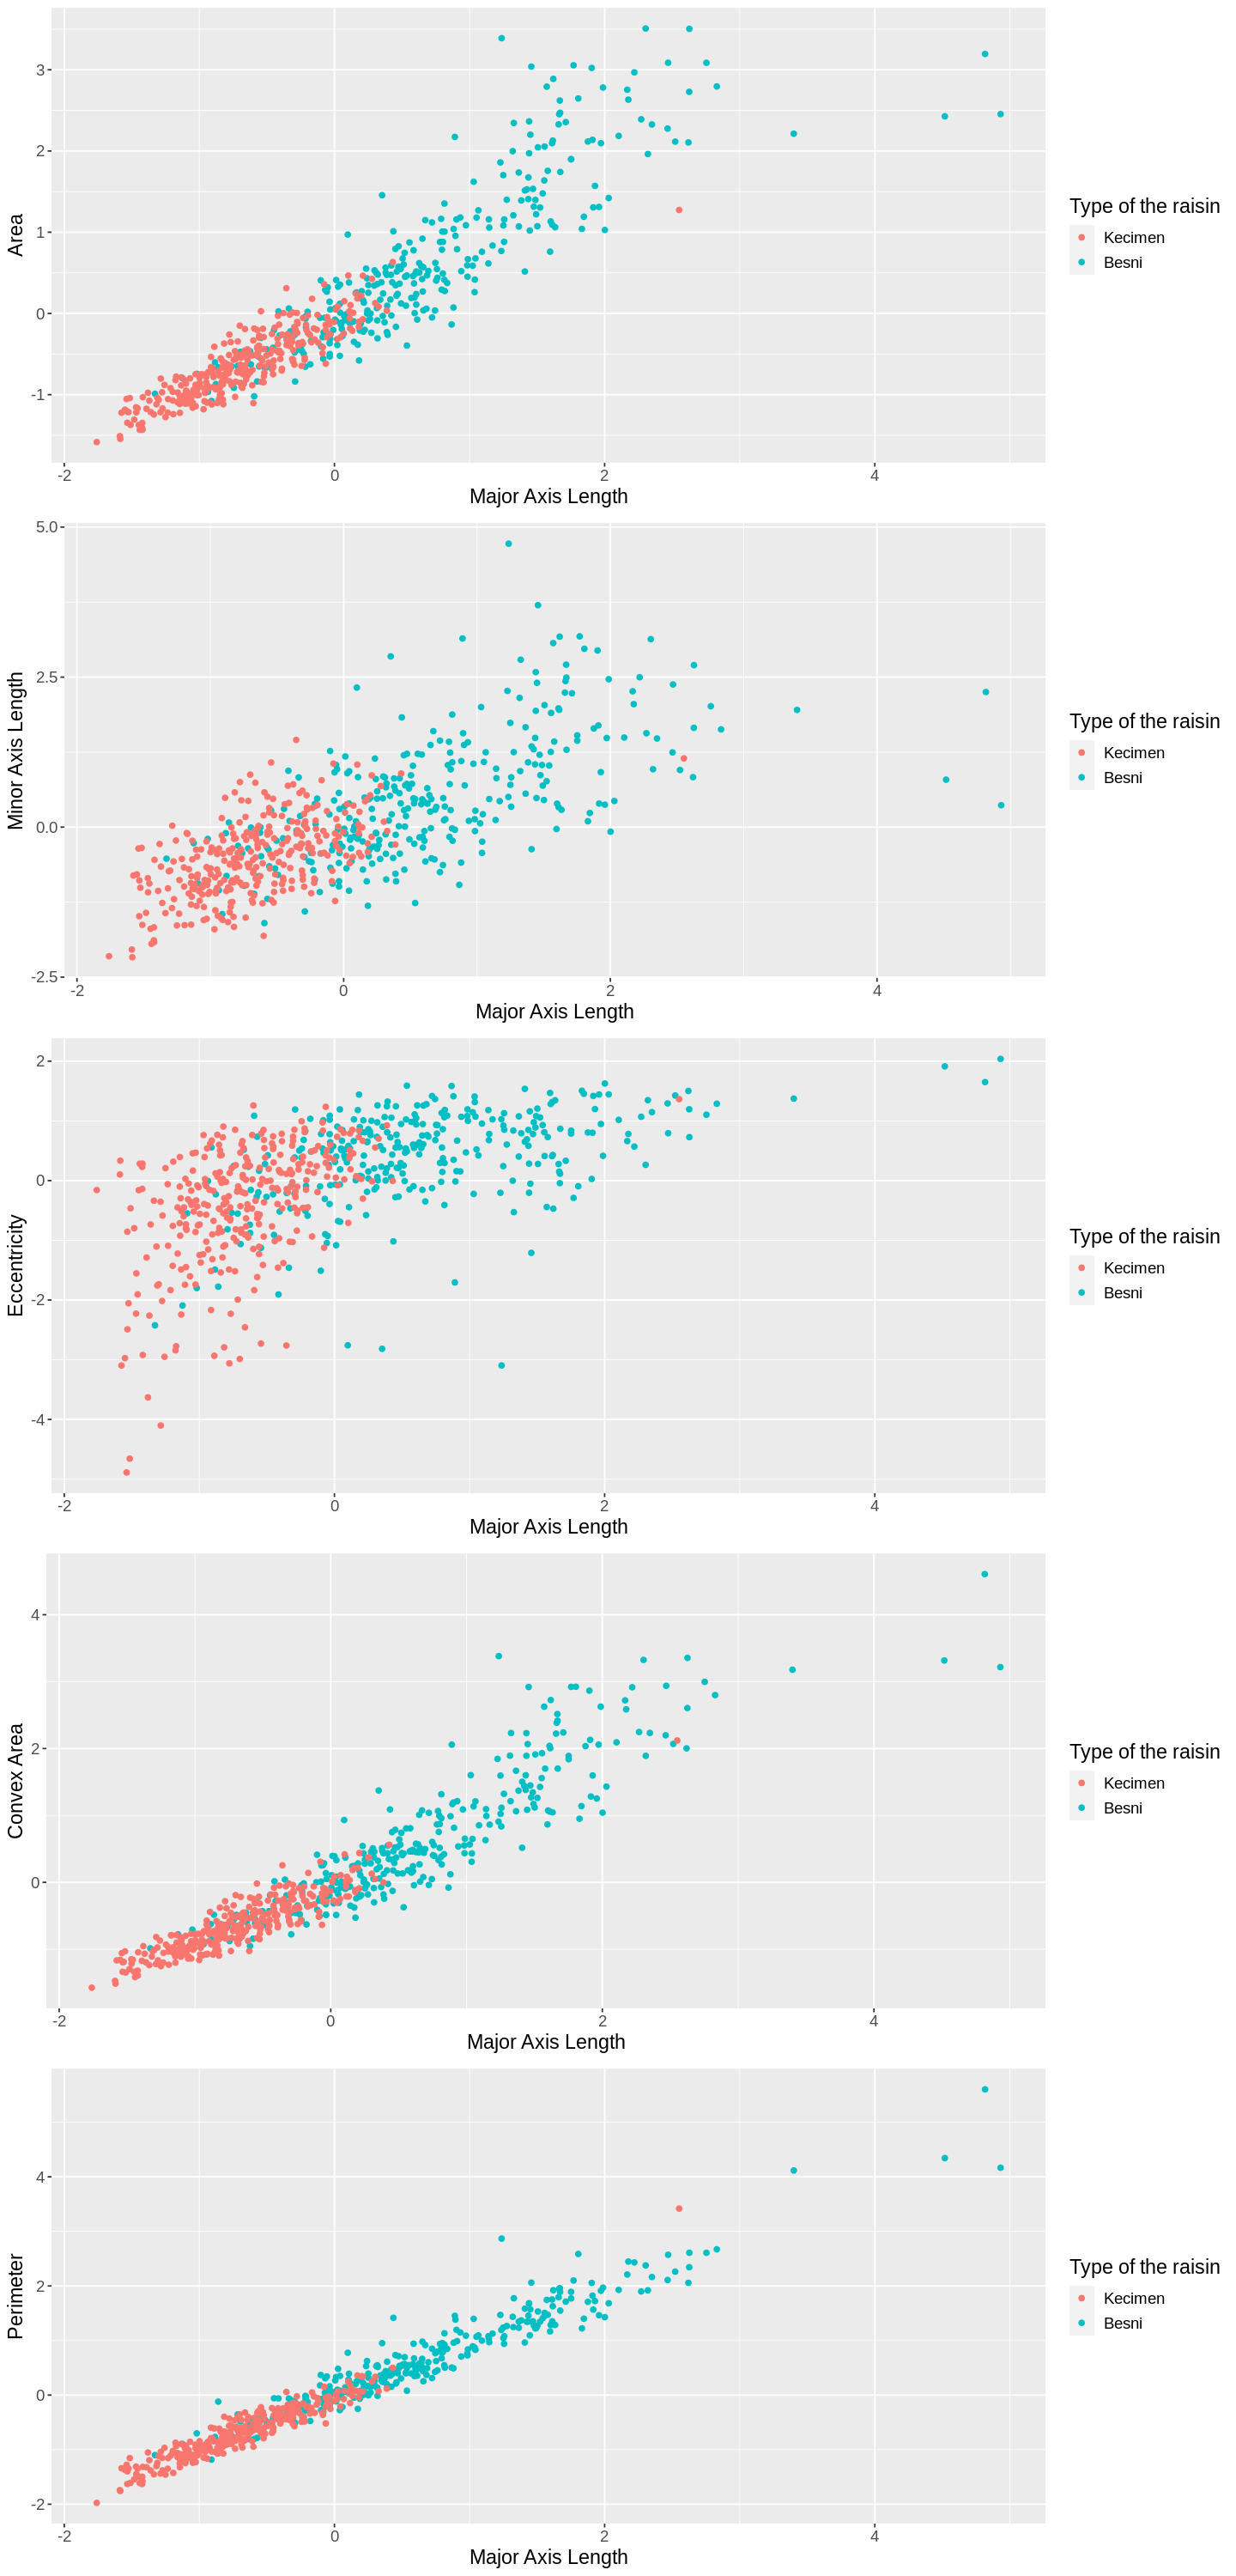

In [113]:
options(repr.plot.width = 12, repr.plot.height = 25)
raisin_plot_1 <- decide_data |>
    ggplot(aes(x = MajorAxisLength, y = Area, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Area", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

raisin_plot_2 <- decide_data |>
    ggplot(aes(x = MajorAxisLength, y = MinorAxisLength, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Minor Axis Length", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

raisin_plot_3 <- decide_data |>
    ggplot(aes(x = MajorAxisLength, y = Eccentricity, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Eccentricity", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

raisin_plot_4 <- decide_data |>
    ggplot(aes(x = MajorAxisLength, y = ConvexArea, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Convex Area", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

raisin_plot_5 <- decide_data |>
    ggplot(aes(x = MajorAxisLength, y = Perimeter, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Perimeter", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

raisin_relation <- plot_grid(raisin_plot_1, raisin_plot_2, 
                             raisin_plot_3, raisin_plot_4, 
                             raisin_plot_5, nrow = 5)
raisin_relation

<span style='background:springgreen'> What we discover from Figure 3 visualization above:</span>
<br>To give us an initial idea how different combination determines the type of the raisin, we had drawn the scatterplots for all 5 different combinations. There is a clear trend that can be observed when we look at the graphs above. The smaller the major axis length , the more likely the raisin is to be classified as Kecimen , regardless of the other confounding variable. However as the major axis length begins to increase , the points on the graph change to the color blue , which signifies it is being classified under the Besni category.

<font color = red>**Part 4: Predictive Data Analysis**

__*** As we are predicting the class of raisin in the dataset, we will be using k-nn Classification method here ***__

Our codes will cover the following in this part:
- Finding prediction accuracy we got from all 5 different combinations
- How different models we got from each combination look like when they are applied on the testing data (visualization)
    
Note: Recall that *MajorAxisLength* is our fixed variable, and *Extent* will NOT be included in our predictive data analysis

In [114]:
# The following objects are those that can be used through all 5 combinations:
raisin_vfold <- vfold_cv(raisin_train, v = 5, strata = Class)                  # cross-validation
gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))                # setting range for k that we will be using to tune our model

<font color = brown>* Explanation of the code above:
<br>Here, we set the cross validation folds and the range of k that we will be using to tune our models.
<br>(Same number of folds and range of k will be used throughout all 5 models that we will be constructing next)

<font color = blue>*Combination 1: MajorAxisLength & Area*

<font color = brown>* Explanation of the code __below__:
<br>Here, we are training the model on one of the predictors which is Area. We do this by creating a recipe to standardise the predictor. Next, we run a gridsearch on various k values, ranging from 1-100. 

In [115]:
area_recipe <- recipe(Class ~ Area, data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

area_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

area_accuracies <- workflow() |>
    add_recipe(area_recipe) |>
    add_model(area_spec) |>
    tune_grid(resamples = raisin_vfold,
              grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
head(area_accuracies)

neighbors .metric  .estimator mean      n std_err     .config              
1  1        accuracy binary     0.7492063 5 0.015592764 Preprocessor1_Model01
2  6        accuracy binary     0.7793651 5 0.009848947 Preprocessor1_Model02
3 11        accuracy binary     0.8079365 5 0.014504498 Preprocessor1_Model03
4 16        accuracy binary     0.8063492 5 0.013654485 Preprocessor1_Model04
5 21        accuracy binary     0.8111111 5 0.012895299 Preprocessor1_Model05
6 26        accuracy binary     0.8111111 5 0.011054276 Preprocessor1_Model06

<font color = brown>* Explanation of the code below:
<br>Here, we are finding the neighbour configuration with highest accuarcy, out of all the trained models.

In [116]:
k_suitable <- area_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors)
k_suitable

[1] 31

<font color = brown>* Explanation of the code below:
<br>Now that we have the best k value, we train the knn classifier with that k value on the entire training set, and predict the outcomes on the test set. We then calculate the accuarcy of those predictions.

In [117]:
area_spec2 <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = k_suitable) |>
    set_engine("kknn") |>
    set_mode("classification")

area_fit <- workflow() |>
    add_recipe(area_recipe) |>
    add_model(area_spec2) |>
    fit(data = raisin_train)

area_test_final <- predict(area_fit, raisin_test) |>
    bind_cols(raisin_test)
head(area_test_final)

area_test_predictions <- area_test_final |>
    metrics(truth = Class, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
area_test_predictions

.pred_class Area  MajorAxisLength MinorAxisLength Eccentricity ConvexArea
1 Kecimen     75166 406.6907        243.0324        0.8018052    78789     
2 Kecimen     42256 323.1896        172.5759        0.8454988    44743     
3 Kecimen     43295 304.2845        182.8110        0.7994070    44714     
4 Kecimen     61251 301.5078        273.6599        0.4197537    64732     
5 Kecimen     49882 287.2643        222.1859        0.6338519    50880     
6 Besni       95245 397.0941        307.2739        0.6334223    97988     
  Extent    Perimeter Class  
1 0.6841296 1121.786  Kecimen
2 0.6980309  849.728  Kecimen
3 0.7138382  814.680  Kecimen
4 0.6435957  971.769  Kecimen
5 0.7663778  843.764  Kecimen
6 0.7530440 1201.390  Kecimen

[1] 0.8111111

<font color = blue>*Combination 2: MajorAxisLength & MinorAxisLength*

<font color = brown>* Explanation of the code below:
<br>Similar to combination 1, we run the same steps but with the predictor MinorAxisLength.

In [118]:
minor_recipe <- recipe(Class ~ MinorAxisLength, data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

minor_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

minor_accuracies <- workflow() |>
    add_recipe(minor_recipe) |>
    add_model(minor_spec) |>
    tune_grid(resamples = raisin_vfold,
              grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

In [119]:
k_suitable <- minor_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors)

In [120]:
minor_spec2 <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = k_suitable) |>
    set_engine("kknn") |>
    set_mode("classification")

minor_fit <- workflow() |>
    add_recipe(minor_recipe) |>
    add_model(minor_spec2) |>
    fit(data = raisin_train)

minor_test_final <- predict(minor_fit, raisin_test) |>
    bind_cols(raisin_test)
head(minor_test_final)

minor_test_predictions <- minor_test_final |>
    metrics(truth = Class, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
minor_test_predictions

.pred_class Area  MajorAxisLength MinorAxisLength Eccentricity ConvexArea
1 Kecimen     75166 406.6907        243.0324        0.8018052    78789     
2 Kecimen     42256 323.1896        172.5759        0.8454988    44743     
3 Kecimen     43295 304.2845        182.8110        0.7994070    44714     
4 Besni       61251 301.5078        273.6599        0.4197537    64732     
5 Kecimen     49882 287.2643        222.1859        0.6338519    50880     
6 Besni       95245 397.0941        307.2739        0.6334223    97988     
  Extent    Perimeter Class  
1 0.6841296 1121.786  Kecimen
2 0.6980309  849.728  Kecimen
3 0.7138382  814.680  Kecimen
4 0.6435957  971.769  Kecimen
5 0.7663778  843.764  Kecimen
6 0.7530440 1201.390  Kecimen

[1] 0.6962963

<font color = blue>*Combination 3: MajorAxisLength & Eccentricity*

<font color = brown>* Explanation of the code below:
<br>Similar to combination 1, we run the same steps but with the predictor Eccentricity.

In [121]:
ecc_recipe <- recipe(Class ~ Eccentricity, data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

ecc_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

ecc_accuracies <- workflow() |>
    add_recipe(ecc_recipe) |>
    add_model(ecc_spec) |>
    tune_grid(resamples = raisin_vfold,
              grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

In [122]:
k_suitable <- ecc_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors)

In [123]:
ecc_spec2 <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = k_suitable) |>
    set_engine("kknn") |>
    set_mode("classification")

ecc_fit <- workflow() |>
    add_recipe(ecc_recipe) |>
    add_model(ecc_spec2) |>
    fit(data = raisin_train)

ecc_test_final <- predict(ecc_fit, raisin_test) |>
    bind_cols(raisin_test)
head(ecc_test_final)

ecc_test_predictions <- ecc_test_final |>
    metrics(truth = Class, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
ecc_test_predictions

.pred_class Area  MajorAxisLength MinorAxisLength Eccentricity ConvexArea
1 Besni       75166 406.6907        243.0324        0.8018052    78789     
2 Besni       42256 323.1896        172.5759        0.8454988    44743     
3 Kecimen     43295 304.2845        182.8110        0.7994070    44714     
4 Kecimen     61251 301.5078        273.6599        0.4197537    64732     
5 Kecimen     49882 287.2643        222.1859        0.6338519    50880     
6 Kecimen     95245 397.0941        307.2739        0.6334223    97988     
  Extent    Perimeter Class  
1 0.6841296 1121.786  Kecimen
2 0.6980309  849.728  Kecimen
3 0.7138382  814.680  Kecimen
4 0.6435957  971.769  Kecimen
5 0.7663778  843.764  Kecimen
6 0.7530440 1201.390  Kecimen

[1] 0.762963

<font color = blue>*Combination 4: MajorAxisLength & ConvexArea*

<font color = brown>* Explanation of the code below:
<br>Similar to combination 1, we run the same steps but with the predictor ConvexArea.

In [124]:
convex_recipe <- recipe(Class ~ ConvexArea, data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

convex_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

convex_accuracies <- workflow() |>
    add_recipe(convex_recipe) |>
    add_model(convex_spec) |>
    tune_grid(resamples = raisin_vfold,
              grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

In [125]:
k_suitable <- convex_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors)

In [126]:
convex_spec2 <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = k_suitable) |>
    set_engine("kknn") |>
    set_mode("classification")

convex_fit <- workflow() |>
    add_recipe(convex_recipe) |>
    add_model(convex_spec2) |>
    fit(data = raisin_train)

convex_test_final <- predict(convex_fit, raisin_test) |>
    bind_cols(raisin_test)
head(convex_test_final)

convex_test_predictions <- convex_test_final |>
    metrics(truth = Class, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
convex_test_predictions

.pred_class Area  MajorAxisLength MinorAxisLength Eccentricity ConvexArea
1 Kecimen     75166 406.6907        243.0324        0.8018052    78789     
2 Kecimen     42256 323.1896        172.5759        0.8454988    44743     
3 Kecimen     43295 304.2845        182.8110        0.7994070    44714     
4 Kecimen     61251 301.5078        273.6599        0.4197537    64732     
5 Kecimen     49882 287.2643        222.1859        0.6338519    50880     
6 Besni       95245 397.0941        307.2739        0.6334223    97988     
  Extent    Perimeter Class  
1 0.6841296 1121.786  Kecimen
2 0.6980309  849.728  Kecimen
3 0.7138382  814.680  Kecimen
4 0.6435957  971.769  Kecimen
5 0.7663778  843.764  Kecimen
6 0.7530440 1201.390  Kecimen

[1] 0.8148148

<font color = blue>*Combination 5: MajorAxisLength & Perimeter*

<font color = brown>* Explanation of the code below:
<br>Similar to combination 1, we run the same steps but with the predictor Perimeter.

In [127]:
per_recipe <- recipe(Class ~ Perimeter, data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

per_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

per_accuracies <- workflow() |>
    add_recipe(per_recipe) |>
    add_model(per_spec) |>
    tune_grid(resamples = raisin_vfold,
              grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

In [128]:
k_suitable <- per_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors)

In [129]:
per_spec2 <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = k_suitable) |>
    set_engine("kknn") |>
    set_mode("classification")

per_fit <- workflow() |>
    add_recipe(per_recipe) |>
    add_model(per_spec2) |>
    fit(data = raisin_train)

per_test_final <- predict(per_fit, raisin_test) |>
    bind_cols(raisin_test)
head(per_test_final)

per_test_predictions <- per_test_final |>
    metrics(truth = Class, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
per_test_predictions

.pred_class Area  MajorAxisLength MinorAxisLength Eccentricity ConvexArea
1 Kecimen     75166 406.6907        243.0324        0.8018052    78789     
2 Kecimen     42256 323.1896        172.5759        0.8454988    44743     
3 Kecimen     43295 304.2845        182.8110        0.7994070    44714     
4 Kecimen     61251 301.5078        273.6599        0.4197537    64732     
5 Kecimen     49882 287.2643        222.1859        0.6338519    50880     
6 Besni       95245 397.0941        307.2739        0.6334223    97988     
  Extent    Perimeter Class  
1 0.6841296 1121.786  Kecimen
2 0.6980309  849.728  Kecimen
3 0.7138382  814.680  Kecimen
4 0.6435957  971.769  Kecimen
5 0.7663778  843.764  Kecimen
6 0.7530440 1201.390  Kecimen

[1] 0.8518519

<font color = red>__Part 5: Results and Conclusions__

Our codes will cover the following in this part:
- Making a tibble combing all of measuring accuracies obtained from the above 5 combinations
- Comparing which combination will give us the best prediction on raisin type
- Other visualizations and acquisitions

<font color = brown>* Explanation of the codes below:
<br>Now, we list all the accuracies of the models trained with their predictor combination, and put the accuracies in descending order to find the best one.

In [130]:
all_accuracies <- tibble(var_name = c("Area", "MinorAxisLength", "Eccentricity", "ConvexArea", "Perimeter"),
    accuracy = c(area_test_predictions, minor_test_predictions, 
                 ecc_test_predictions, convex_test_predictions, per_test_predictions))       
all_accuracies

var_name        accuracy 
1 Area            0.8111111
2 MinorAxisLength 0.6962963
3 Eccentricity    0.7629630
4 ConvexArea      0.8148148
5 Perimeter       0.8518519

##### Table 5 (below): Prediction accuracies for all 5 combinations

In [131]:
best_comb <- all_accuracies |>
    arrange(desc(accuracy))
best_comb

var_name        accuracy 
1 Perimeter       0.8518519
2 ConvexArea      0.8148148
3 Area            0.8111111
4 Eccentricity    0.7629630
5 MinorAxisLength 0.6962963

<span style='background:yellow'> <font color = red>__Conclusion we achieved from Table 5:__</span>
<br><font color = red>The combination of MajorAxisLength with Perimeter will give us the most accurate predictions on raisin type!!!

#### <font color = darkcyan>Below are other visualizations and results we created or got to better enrich our data analysis process

##### Figure 4 (below): Wrong predictions made by MajorAxisLength & Perimeter model and Correct class labels for all testing data

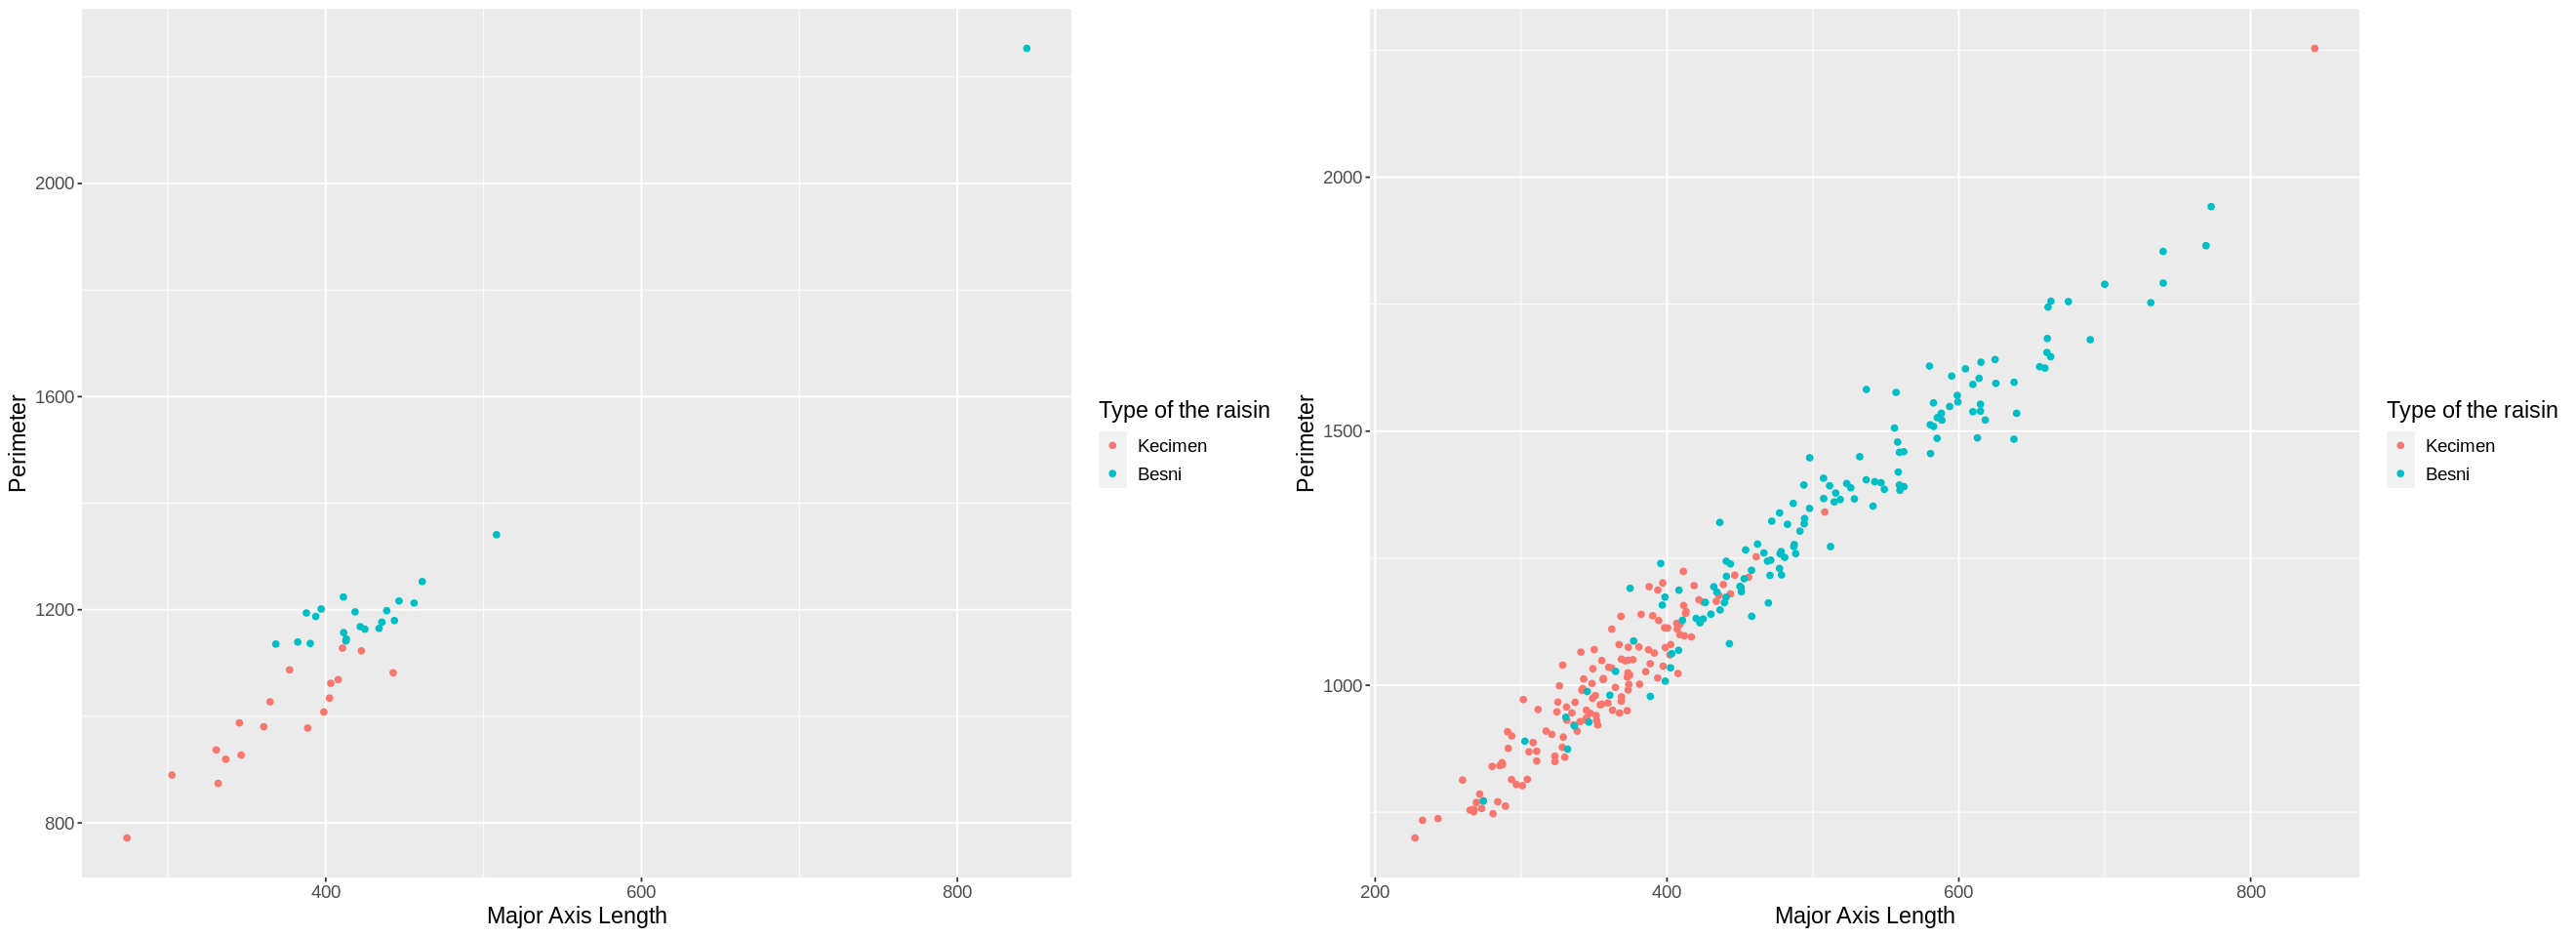

In [132]:
options(repr.plot.width = 22, repr.plot.height = 8)

wrong_prediction <- per_test_final |>
    filter(.pred_class != Class)

wrong_prediction_graph <- wrong_prediction |>
    ggplot(aes(x = MajorAxisLength, y = Perimeter, color = .pred_class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Perimeter", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

correct_type_raisin <- per_test_final |>
    ggplot(aes(x = MajorAxisLength, y = Perimeter, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Perimeter", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

compare_wrong_vs_correct <- plot_grid(wrong_prediction_graph, correct_type_raisin, ncol = 2)
compare_wrong_vs_correct

<span style='background:springgreen'> Interpretation for Figure 4:</span>
<br>It can be observed in the left graph that class of kecimen was predicted wrong compared to the actual right graph. This is because the k nearest neighbours near it was of the type kecinen where in actual it belonged to the class of Besni. 
<br>Similarly besni was predicted wrong in the left graph as it had all the classes of besni near it but it belonged to the class of kecimen.
There is also a Kecimen outlier on the top right corner of the graph that is missclassified, because it lied in the far corner of the graph. This is because the closest labels to it were Besni. 

##### Table 6 (below): Confusion matrix for combination: MajorAxisLength & Perimeter

In [133]:
confusion <- per_test_final |>
    conf_mat(truth = Class, estimate = .pred_class)
confusion

          Truth
Prediction Kecimen Besni
   Kecimen     113    18
   Besni        22   117

<span style='background:springgreen'> Interpretation for Table 6:</span>
<br>The confusion matrix shows 113 observations were correctly predicted as Kecimen, and 117 were correctly predicted as Besni. Therefore the classifier labeled 113 + 117 = 230 observations correctly. It also shows that the classifier made some mistakes; in particular, it classified 22 observations as Besni when they were truly Kecimen, and 18 observations as Kecimen when they were truly Besni. [3]

### <font color = Purple>Discussion

- *What we found:*

We first found the best variable to be used as our fixed predictor, which was the MajorAxisLength. We did this by creating boxplots of all the variables and identifying which might contribute the most to distinguishing between raisin types. After comparing different combinations' prediction accuracies, we found that the best predictor to help classify the raisin type in an image when combined with MajorAxisLength is the Perimeter variable.

- *Whether this is what we expected to find:*

When we were drawing boxplots in the beginning, we noticed that both MajorAxisLength and Perimeter gave us the most different interval ranges for two types of raisins. Therefore, we strongly speculated that their combinations would distinguish those two types of raisins more easily and reliably. After comparing all models' accuracies, it turns out the best combination is indeed them. Therefore, this is in line with our expectations.


- *Impact of our findings:*

Our data analysis allowed us to determine which numerical variable combined with our fixed variable *MajorAxisLength* best determined the type of raisin in an image. One impact that this analysis might work is to allow other raisins in different images to be distinguished based on this combination, which we determined to be MajorAxisLength & Perimeter. By collecting more data on the MajorAxisLength and Perimeter parameters of raisins' images, we can more easily determine their types. This is one impact of our findings.

- *What future questions could this lead to:*

A question that immediately comes to mind is what if we incorporated other classes/types of raisins into our categorical variable that we are trying to predict? Surely there are more than just two types of raisins. If we could find a dataset that included more than two types of raisins, we could explore whether MajorAxisLength & Perimeter would still be the best combination to determine their types. We could also explore if there are other combinations that do a better job of predicting the class of raisin in an image when other categories are involved. These are just a few examples of further predictive analysis.

### <font color = Purple>References and Citations

[1] “What Is a Raisin?” The Spruce Eats, www.thespruceeats.com/raisin-storage-and-selection-1807799. Accessed 5 Dec. 2022.

[2] (no date) UCI Machine Learning Repository: Raisin Dataset Data set. Available at: https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset. Accessed: December 5, 2022.

[3] Peng, Tiffany Timbers, Trevor Campbell, and Melissa Lee Foreword by Roger. Data Science. datasciencebook.ca, https://datasciencebook.ca. Accessed 5 Dec. 2022.

Team, TechVidvan. “R Classification - Algorithms, Applications and Examples.” TechVidvan, 6 May 2020, https://techvidvan.com/tutorials/classification-in-r/#:~:text=What%20is%20R%20Classification%3F. Accessed 5 Dec. 2022.

*Notice: The second citation is the source of our dataset, and the third is the textbook we were using in DSCI 100*.